<a href="https://colab.research.google.com/github/AngelB26/Machine_learning_projects/blob/main/Disease_Prediction_Using_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
from scipy.stats import mode
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
#Reading the train.csv by removing the last column since its's an empty column
Data_path="/content/Training.csv"
data=pd.read_csv(Data_path).dropna(axis=1)

In [3]:
data.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


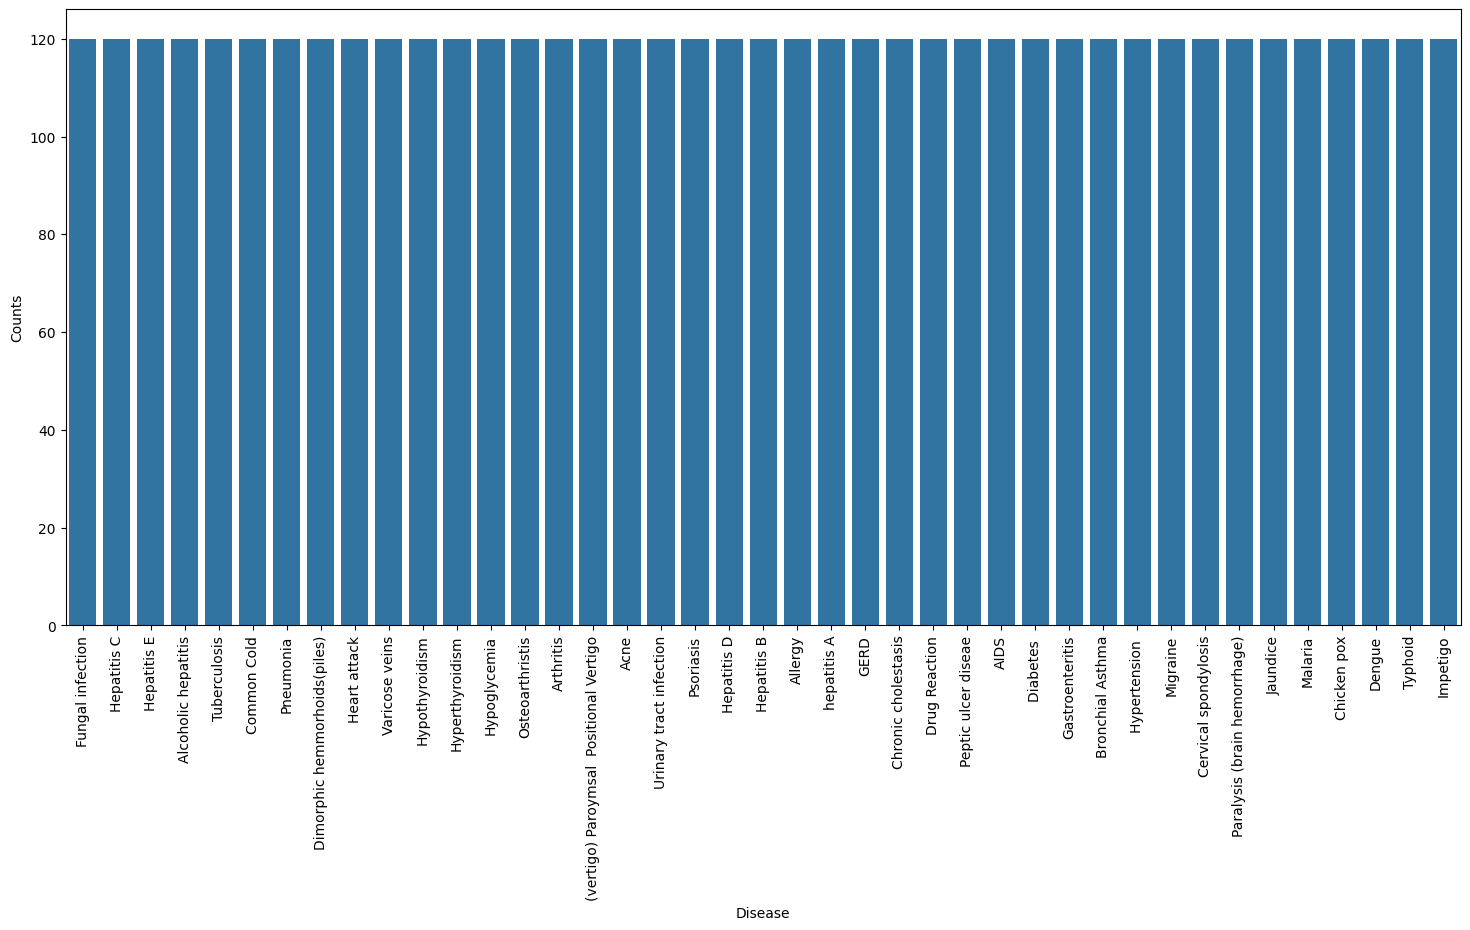

In [4]:
#checking whether the dataset is balanced or not
disease_counts=data['prognosis'].value_counts()
temp_df=pd.DataFrame({
    "Disease": disease_counts.index,
    "Counts":disease_counts.values
})

plt.figure(figsize=(18,8))
sns.barplot(x="Disease",y="Counts",data=temp_df)
plt.xticks(rotation=90)
plt.show()

In [ ]:
#From the above plot, we can observe that the dataset is a balanced dataset i.e. there are exactly 120 samples for each disease, and no further balancing is required.

In [11]:
data.dtypes

itching                  int64
skin_rash                int64
nodal_skin_eruptions     int64
continuous_sneezing      int64
shivering                int64
                         ...  
inflammatory_nails       int64
blister                  int64
red_sore_around_nose     int64
yellow_crust_ooze        int64
prognosis               object
Length: 133, dtype: object

In [ ]:
#our target column is of object datatype.So using label encoder to convert the column to numerical datatype
#label encoder converts the labels into numerical form by assigning a unique index to the labels. If the total no of labels is n then the no assigned to each label will be between 0 to n-1

In [12]:
#Encoding the target value into numerical
#value using LabelEncoder
encoder= LabelEncoder()
data['prognosis']=encoder.fit_transform(data['prognosis'])

In [13]:
#splitting the data for training and testing the model
x=data.iloc[:,:-1]
y=data.iloc[:,-1]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

print(f"Train:{x_train.shape},{y_train.shape}")
print(f"Test:{x_test.shape},{y_test.shape}")

Train:(3936, 132),(3936,)
Test:(984, 132),(984,)


In [ ]:
#Model Building
#Using K-Fold cross-validation for model selection

In [14]:
#defining scoring metric for k-fold cross validation
def cv_scoring(estimator,x,y):
  return accuracy_score(y,estimator.predict(x))

#Initializing Models
models={
    "SVC":SVC(),
    "Gaussian NB":GaussianNB(),
    "Random Forest": RandomForestClassifier(random_state=18)
}

#producing cross_validation score for the models
for model_name in models:
  model=models[model_name]
  scores=cross_val_score(model,x,y,cv=10,n_jobs=-1,scoring=cv_scoring)
  print("=="*30)
  print(model_name)
  print(f"Scores: {scores}")
  print(f"Mean Score:{np.mean(scores)}")

SVC
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score:1.0
Gaussian NB
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score:1.0
Random Forest
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score:1.0


In [ ]:
#From the above output, we can notice that all our machine learning algorithms are performing very well and the mean scores after k fold cross-validation are also very high.
#Building robust classifier by combining all models:

Accuracy on train data by SVM Classifier\:100.0
Accuracy on test data by SVM Classifier\:100.0


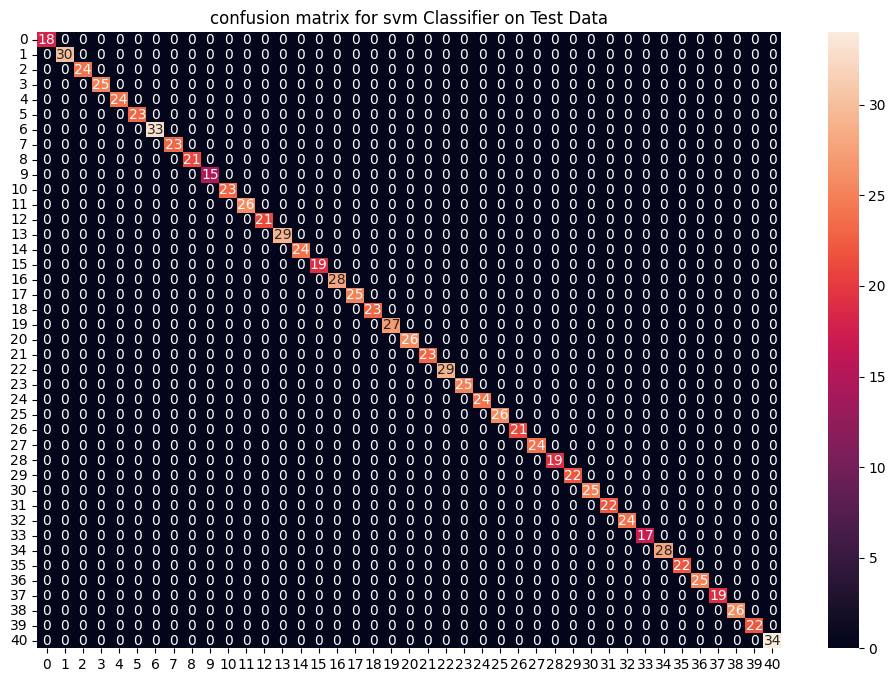

In [15]:
#Training and testing SVM Classifier
svm_model=SVC()
svm_model.fit(x_train,y_train)
preds=svm_model.predict(x_test)

print(f"Accuracy on train data by SVM Classifier\:{accuracy_score(y_train,svm_model.predict(x_train))*100}")

print(f"Accuracy on test data by SVM Classifier\:{accuracy_score(y_test,preds)*100}")
cf_matrix=confusion_matrix(y_test,preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix,annot=True)
plt.title("confusion matrix for svm Classifier on Test Data")
plt.show()

Accuracy on train data by naive bayes classifier\:100.0
Accuracy on test data by naive bayes classifier\:100.0


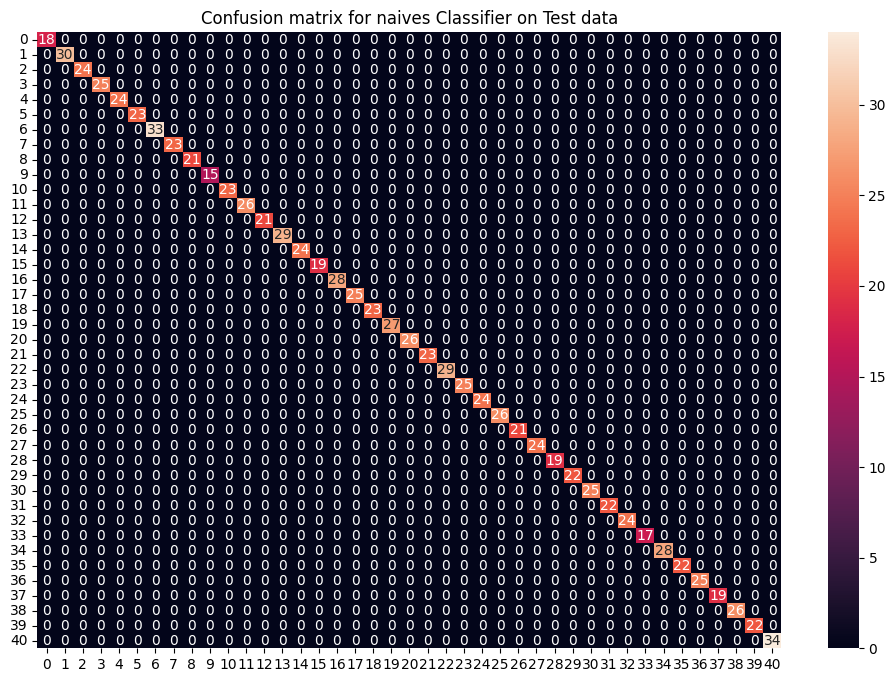

In [17]:
#Training and testing on Naive Bayes classifier
nb_model=GaussianNB()
nb_model.fit(x_train,y_train)
preds=nb_model.predict(x_test)
print(f"Accuracy on train data by naive bayes classifier\:{accuracy_score(y_train,nb_model.predict(x_train))*100}")

print(f"Accuracy on test data by naive bayes classifier\:{accuracy_score(y_test,preds)*100}")
cf_matrix=confusion_matrix(y_test,preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix,annot=True)
plt.title("Confusion matrix for naives Classifier on Test data")
plt.show()

Accuracy on train data by Random Forest Classifier: 100.0
Accuracy on test data by Random Forest Classifier: 100.0


Text(0.5, 1.0, 'Confusion Matrix for Random Forest Classifier on Test Data')

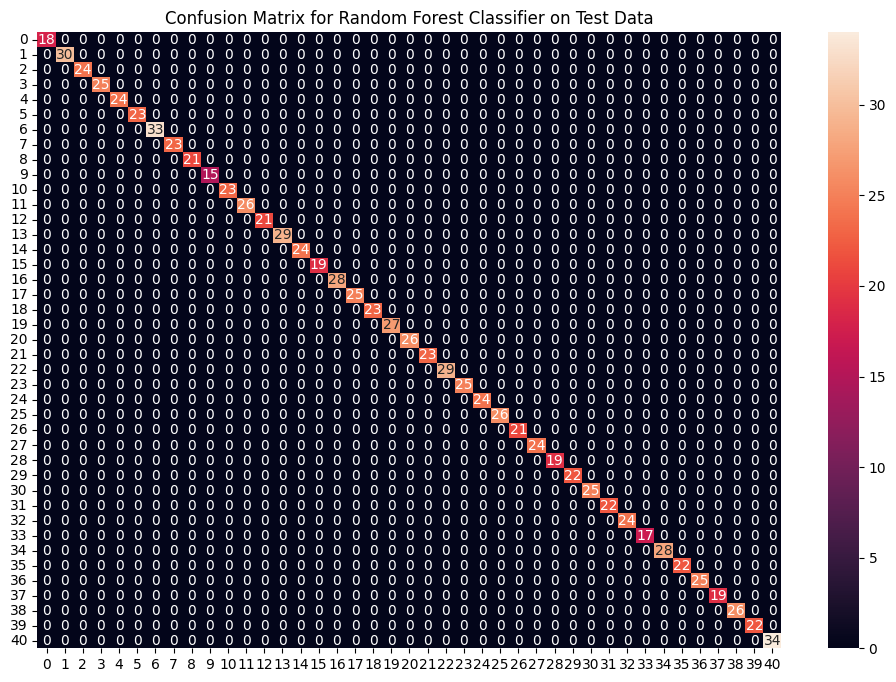

In [21]:
#Testing and training Random forest classifier
rf_model=RandomForestClassifier(random_state=18)
rf_model.fit(x_train,y_train)
preds=rf_model.predict(x_test)
print(f"Accuracy on train data by Random Forest Classifier\
: {accuracy_score(y_train, rf_model.predict(x_train))*100}")

print(f"Accuracy on test data by Random Forest Classifier\
: {accuracy_score(y_test, preds)*100}")

cf_matrix = confusion_matrix(y_test, preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Random Forest Classifier on Test Data")

In [ ]:
#From the above confusion matrices, we can see that the models are performing very well on the unseen data. Now we will be training the models on the whole train data present in the dataset that we downloaded and then test our combined model on test data present in the dataset.

In [ ]:
#Fitting the model on whole data and validating on the Test dataset:

Accuracy on Test dataset by the combined model: 100.0


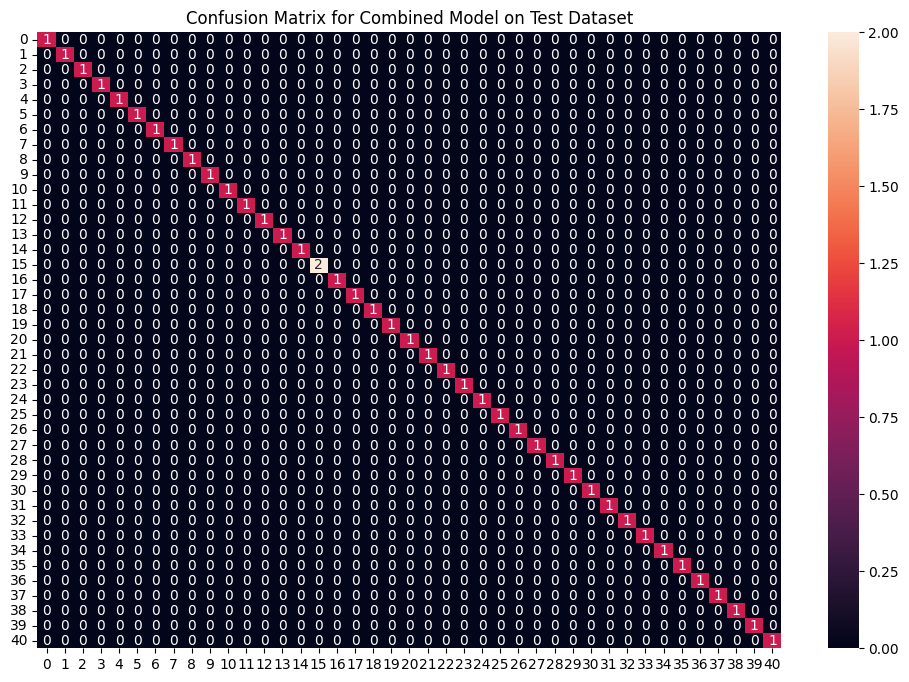

In [37]:
# Training the models on whole data
final_svm_model = SVC()
final_nb_model = GaussianNB()
final_rf_model = RandomForestClassifier(random_state=18)
final_svm_model.fit(x, y)
final_nb_model.fit(x, y)
final_rf_model.fit(x, y)

# Reading the test data
test_data = pd.read_csv("/content/Testing.csv").dropna(axis=1)

test_X = test_data.iloc[:, :-1]
test_Y = encoder.transform(test_data.iloc[:, -1])

# Making prediction by take mode of predictions
# made by all the classifiers
svm_preds = final_svm_model.predict(test_X)
nb_preds = final_nb_model.predict(test_X)
rf_preds = final_rf_model.predict(test_X)

final_preds = [i for i, j, k in zip(svm_preds, nb_preds, rf_preds)]
print(f"Accuracy on Test dataset by the combined model\
: {accuracy_score(test_Y, final_preds)*100}")
# Displaying the confusion matrix
cf_matrix = confusion_matrix(test_Y, final_preds)
plt.figure(figsize=(12, 8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Combined Model on Test Dataset")
plt.show()

We can see that our combined model has classified all the data points accurately. We have come to the final part of this whole implementation, we will be creating a function that takes symptoms separated by commas as input and outputs the predicted disease using the combined model based on the input symptoms.

In [ ]:
#Creating a function that can take symptoms as input and generate predictions for disease

In [40]:
def mode(lst):
    try:
        return mode_stat(lst)
    except StatisticsError:
        return max(set(lst), key=lst.count)

# Define the symptom index dictionary and data dictionary
symptoms = x.columns.values
symptom_index = {}
for index, value in enumerate(symptoms):
    symptom = " ".join([i.capitalize() for i in value.split("_")])
    symptom_index[symptom] = index

data_dict = {
    "symptom_index": symptom_index,
    "predictions_classes": encoder.classes_
}

# Define the predictDisease function
def predictDisease(symptoms):
    symptoms = symptoms.split(",")
    input_data = [0] * len(data_dict["symptom_index"])
    for symptom in symptoms:
        index = data_dict["symptom_index"][symptom]
        input_data[index] = 1
    input_data = np.array(input_data).reshape(1, -1)

    rf_prediction = data_dict["predictions_classes"][final_rf_model.predict(input_data)[0]]
    nb_prediction = data_dict["predictions_classes"][final_nb_model.predict(input_data)[0]]
    svm_prediction = data_dict["predictions_classes"][final_svm_model.predict(input_data)[0]]

    final_prediction = mode([rf_prediction, nb_prediction, svm_prediction])

    predictions = {
        "rf_model_prediction": rf_prediction,
        "naive_bayes_prediction": nb_prediction,
        "svm_model_prediction": svm_prediction,
        "final_prediction": final_prediction
    }
    return predictions

# Testing the function
print(predictDisease("Itching,Skin Rash,Nodal Skin Eruptions"))


{'rf_model_prediction': 'Fungal infection', 'naive_bayes_prediction': 'Fungal infection', 'svm_model_prediction': 'Fungal infection', 'final_prediction': 'Fungal infection'}


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
